In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")


## 数据集与加载说明：`fetch_openml('mnist_784')`

### 1. 数据集介绍：MNIST

MNIST（Mixed National Institute of Standards and Technology）是机器学习和计算机视觉领域最经典的图像分类数据集之一：

| 内容   | 描述                         |
| ---- | -------------------------- |
| 样本数量 | 70,000 张图像                 |
| 图像大小 | 28×28 像素的灰度图               |
| 特征数量 | 784（即 28×28 拉平成一维）         |
| 标签   | 数字 0 到 9（共 10 类）           |
| 类型   | 分类任务（digit classification） |

每个图像被展开成一个 784 维向量（784 个像素），其对应标签是图像中表示的数字。


### 2. 函数介绍：`fetch_openml()`

`fetch_openml()` 是 `scikit-learn` 提供的一个数据获取工具，它允许我们从 [OpenML 数据库](https://www.openml.org/) 下载标准公开数据集，常用于快速实验。

sklearn.datasets包含3中类型的函数：fetch_*用来下载数据集，load_*用来加载和sklearn捆绑的小数据集（不需要互联网下载），make_*用于生成假数据集，可用于测试
#### 基本用法：

```python
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
```

| 参数              | 含义                         |
| --------------- | -------------------------- |
| `'mnist_784'`   | OpenML 上 MNIST 数据集的 ID 或名称 |
| `as_frame`      | 是否返回 `pandas.DataFrame` 格式 |
| `parser='auto'` | 自动选择数据解析方式，推荐保留此默认值        |


### 3. 参数说明：`as_frame=False`

* 默认：`as_frame=True` 会将数据以 `pandas.DataFrame` 和 `pandas.Series` 的形式返回。
* 在本例中我们设置 `as_frame=False`，其效果是：

> 返回的数据将是 `NumPy` 数组格式：

### 为什么使用 `as_frame=False`？

* 图像数据是一堆像素值的矩阵，不适合看成结构化的表格

### 返回值说明
数据集作为sklearn.utils.Bunch对象返回，这些对象是字典，键也可以通过属性访问。 "DESCR"数据集的描述，"data"输入数据，"target"标签"

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# 获取图片特征和分类标签
X, y = mnist.data, mnist.target
X
X.shape
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

todo: 介绍图片特征 和 绘图函数

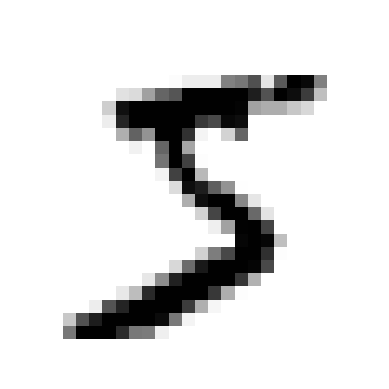

In [4]:
import matplotlib.pyplot as plt

def plot_digit(img_data):
    image = img_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]   # 图像和 y[0]对应
plot_digit(some_digit)
plt.show()

In [5]:
# 随堂练习：利用plt 画前100张手写数字图片， 提示：plt.subplots

In [7]:
# 简单的训练集和测试集分离
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# plt.figure(figsize=(9, 9))
# for idx, image_data in enumerate(X[:100]):
#     plt.subplot(10, 10, idx + 1)
#     plot_digit(image_data)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()

In [9]:
# 随堂练习：根据标签的分布情况，来分层采样测试集; 并验证分离后 维持了原数据的标签分布

训练集已经打乱了，这可以保证所有交叉验证折叠都是相似的（不会在某个折叠丢失数字）。此外，一些算法对训练集的顺序敏感，如果连续获得相似的实例，它们的性能会很差，打乱数据集可以确保不发生这种情况

In [22]:
y_train_5 = y_train == '5'
y_test_5 = y_test == '5'

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="log_loss", random_state=100)   # 使用log损失函数， 随机梯度先将训练
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(loss='log_loss', random_state=100)

In [23]:
# 用来检测是否是数字5
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

todo: 性能测量

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96645, 0.9164 , 0.9581 ])

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96645
0.9164
0.9581


In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [27]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

todo: 混淆矩阵：计算所有 A/B对的 A类实例被分类为B类的次数

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred  # 每个测试折叠的预测

array([ True, False, False, ...,  True, False, False])

In [29]:
y_train_pred.shape

(60000,)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[52242,  2337],
       [  844,  4577]], dtype=int64)

In [31]:
# 完美的分类预测
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [35]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # 4577 / (2337 + 4577)
recall_score(y_train_5, y_train_pred)  # 4577 / (4577+844)

0.8443091680501752

In [33]:
# F1 分数
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7421159302796919

In [36]:
import numpy as np
y_scores = sgd_clf.decision_function([some_digit])
y_scores

print(np.isclose(y_scores, np.dot(sgd_clf.coef_, some_digit) + sgd_clf.intercept_))   # np.dot(w,x) + b  就是 decision_function在做的事情

threshold = 0
y_some_digit_pred = (y_scores > threshold)

[ True]


In [40]:
threshold = 3500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True, False, False, ...,  True, False, False])

In [37]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


In [38]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)  # todo：什么叫所有可能的阈值

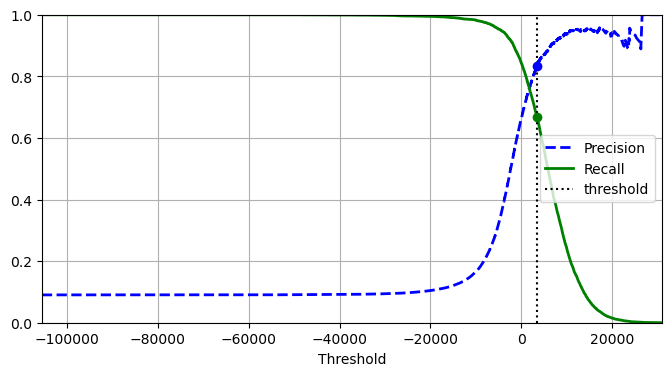

In [47]:

plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], c="b", marker="o")   # "bo" 可以合并
plt.plot(thresholds[idx], recalls[idx], c="g", marker="o")      # "go" 可以合并
plt.axis([np.min(thresholds), np.max(thresholds), 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

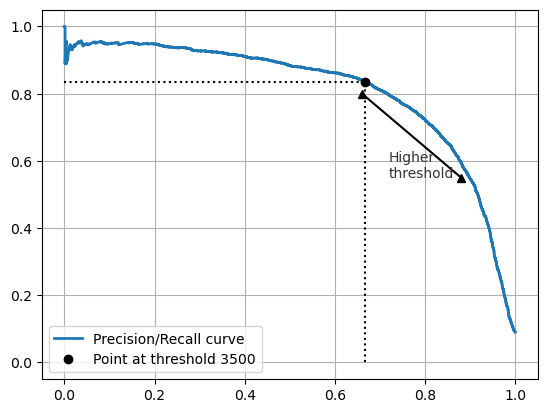

In [72]:
# 召回率-准确率关系图
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], c="black", linestyle=":")  # "k:"可以合并
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3500")

plt.plot((0.88, 0.66), (0.55, 0.80), "k^-")  # ^ 上三角形
plt.text(0.72, 0.55, "Higher\nthreshold", color="#333333")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [73]:
idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

6517.416833261242

In [75]:
y_train_pred_90 = (y_scores > threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

0.45286847445120826

In [81]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)   # fpr: 错误分为阳性的阴性比率  1-真阴性率；   tpr：真阳性率，就是召回率

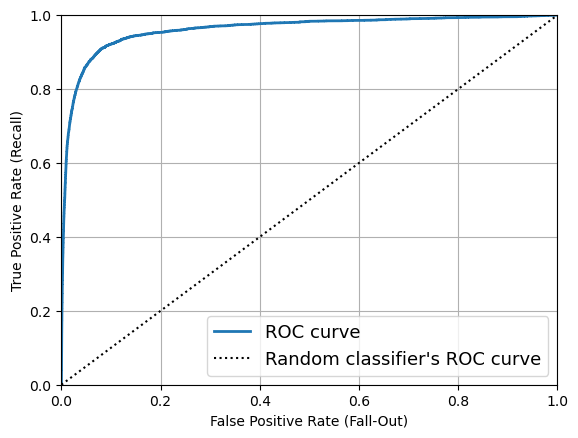

In [87]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()  # 目标：还是锁定准确率90%的点   阈值按降序排列
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

# 试想以下纯随机猜测的混淆矩阵
# p     1-p
# p     1-p
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")  # todo: 为什么随机分类器的ROC curve是一条直线

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9614520950203463

In [89]:
# RandomForestClassifier 比较PR曲线和F1分数
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=100)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [90]:
y_probas_forest[:2]

array([[0.18, 0.82],
       [0.99, 0.01]])

In [93]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

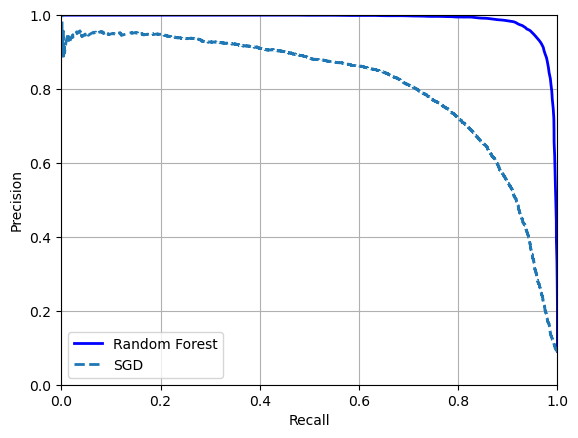

In [94]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [99]:
# RandomForest Classifier的PR曲线在更右上角 比SGD Classifer更好，
y_train_pred_forest = y_probas_forest[:,1] >= 0.5   # 高于50%概率的归为阳性
f1_score(y_train_5, y_train_pred_forest)
roc_auc_score(y_train_5, y_probas_forest[:,1])
precision_score(y_train_5, y_train_pred_forest)
recall_score(y_train_5, y_train_pred_forest)

0.8754842280022136

todo: 多类分类

In [100]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=100)
svm_clf.fit(X_train[:2000], y_train[:2000]) # 注意这里 y_train已经是多分类了，不是y_train_5这种二元分类


SVC(random_state=100)

In [103]:
svm_clf.predict([some_digit])
# svm_clf.decision_function_shape  # 这个只是decision function 返回的shape，默认多分类用OVO处理

array(['5'], dtype=object)

In [109]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

class_id = some_digit_scores.argmax()
class_id

svm_clf.classes_
svm_clf.classes_[class_id]

'5'

In [110]:
# 强制使用一对一 或 一对其余
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=100))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=100))

In [113]:
ovr_clf.predict([some_digit])
ovr_clf.estimators_
len(ovr_clf.estimators_)

array(['5'], dtype='<U1')

In [115]:
#  警告：可能运行1分钟以上
# 训练一个多分类的 SGDClassifier
sgd_clf = SGDClassifier(random_state=100)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=100)

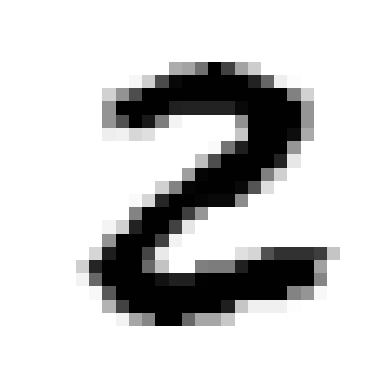

In [130]:
a_digit = X_train[25]
plot_digit(a_digit)

In [134]:
sgd_clf.predict([a_digit]) # 一个预测不对的例子
sgd_clf.decision_function([a_digit]).round()  # 在2，8上的分数比较高
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")  # 每个类别中图像数量大致相同，因此可以用精度指标评估; 警告：代码要运行2-3分钟

array([0.8723 , 0.85635, 0.88385])

In [144]:
# 来个缩放预处理
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

float_64_convert = FunctionTransformer(lambda X: X.astype(np.float64))
sgd_clf_faster = SGDClassifier(random_state=100, learning_rate="invscaling", eta0=0.1)    # 开始的学习率是0.1， 学习率 = 0.1/(1+迭代次数）
scaling_sgd_clf = make_pipeline(float_64_convert, StandardScaler(), sgd_clf_faster)

cross_val_score(scaling_sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9074, 0.9056, 0.9122])

todo: 错误分析

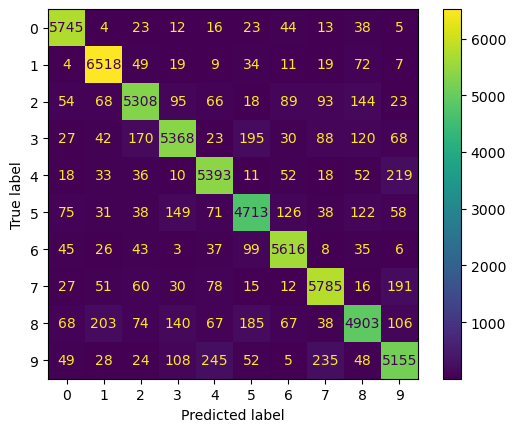

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(scaling_sgd_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

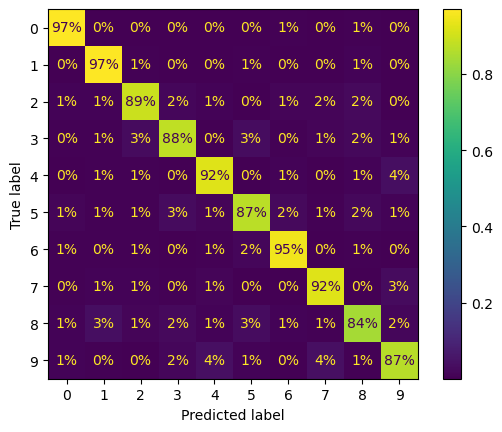

In [149]:
# 数据集上的5更少，还是5可能预测不对？ -> 按行归一化混淆矩阵

#  注意：normalize="true" 是字符串true, 意思是按真实标签来归一化
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")  # values_format=".0%" 显示没有小数的百分比

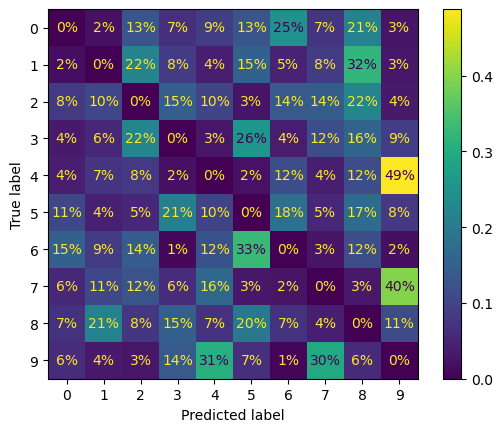

In [151]:
# 把0权重放在正确预测上, 重点强调分类错误
sample_weight = y_train_pred != y_train
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

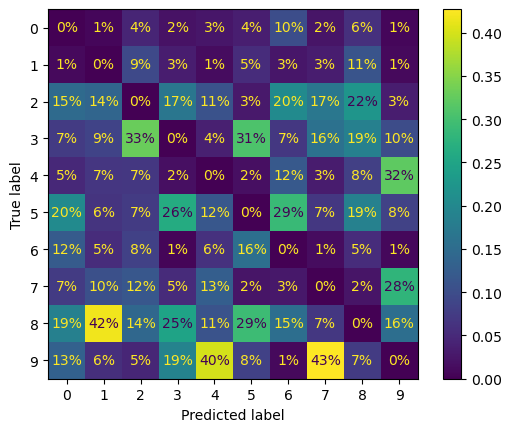

In [152]:
# 混淆矩阵按列归一化，normalize="pred", 按预测来归一化
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.show()

In [157]:
# 深入了解分类器正在做什么，以及失败原因的好办法：分析单个错误
cl_a, cl_b = '1', '8'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

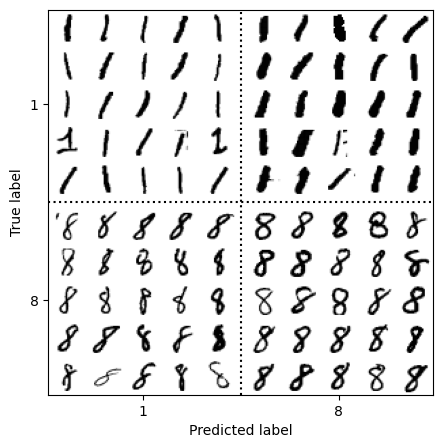

In [158]:
# 两个数字图像 转成混淆矩阵的形式呈现
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])   # 指定两个刻度，对应两个字符串
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

todo：多标签分类，为每个实例输出多个分类

In [159]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= '7'
y_train_odd = y_train.astype('int8') % 2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [161]:
knn_clf.predict([some_digit]) # 5
knn_clf.predict([a_digit])    # 2

array([[False, False]])

In [164]:
# 评估多标签分类器的方式：todo：简单带过
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605